# Import Required Libraries

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from flask import Flask, request, jsonify
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

### Loading the Dataset

In [3]:
# Load dataset
df = pd.read_csv('loan_data.csv')

# Preview data
df.head().T

,0,1,2,3,4
Loan_ID,LP001003,LP001005,LP001006,LP001008,LP001013
Gender,Male,Male,Male,Male,Male
Married,Yes,Yes,Yes,No,Yes
Dependents,1,0,0,0,0
Education,Graduate,Graduate,Not Graduate,Graduate,Not Graduate
Self_Employed,No,Yes,No,No,No
ApplicantIncome,4583,3000,2583,6000,2333
CoapplicantIncome,1508.0,0.0,2358.0,0.0,1516.0
LoanAmount,128,66,120,141,95
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [4]:
# create a copy of the 
df = df.copy(deep=True)

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


In [6]:
# check for the total rows and columns 
print(f'total number of rows: {df.shape[0]} => total number of columns: {df.shape[1]}')

total number of rows: 381 => total number of columns: 13


In [7]:
# check for the brief column summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


# Data Preprocessing
- Normalizing the column names 
- Replacing empty string with nan and fill for missing values 
- Deleted the loan id and other columns 
- Change the data type on the columns

In [8]:
# check for missing values 
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# lets check for duplicates 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Length: 381, dtype: bool

In [10]:
# Convert the column names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [11]:
# Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [12]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [13]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


In [14]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [15]:
# Feature Engineering: Create TotalIncome
df['totalincome'] = df['applicantincome'] + df['coapplicantincome']

In [16]:
# Drop unnecessary columns
df = df.drop(['loan_id', 'applicantincome', 'coapplicantincome'], axis=1)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['loanamount', 'loan_amount_term', 'totalincome']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [17]:
df

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,loan_status,totalincome
0,1,1,1,0,0,0.812575,0.275147,1.0,0,0,0.511157
1,1,1,0,0,1,-1.376596,0.275147,1.0,2,1,-0.769346
2,1,1,0,1,0,0.530102,0.275147,1.0,2,1,0.034749
3,1,0,0,0,0,1.271595,0.275147,1.0,2,1,0.473459
4,1,1,0,1,0,-0.352629,0.275147,1.0,2,1,-0.417632
...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3+,0,0,0.812575,0.275147,1.0,2,1,0.350421
377,1,1,0,0,0,0.106391,0.275147,1.0,0,1,0.134587
378,0,0,0,0,0,-1.200050,0.275147,1.0,0,1,-0.810773
379,1,1,3+,0,0,-2.294635,-2.390052,1.0,0,1,-0.311165


In [18]:
# Viewing columns data types
df.dtypes

gender                int64
married               int64
dependents           object
education             int64
self_employed         int64
loanamount          float64
loan_amount_term    float64
credit_history       object
property_area         int64
loan_status           int64
totalincome         float64
dtype: object

In [19]:
# Replace '3+' with 3 and convert to integer
df['dependents'] = df['dependents'].replace('3+', 3).astype(int)

In [20]:
df.dtypes

gender                int64
married               int64
dependents            int64
education             int64
self_employed         int64
loanamount          float64
loan_amount_term    float64
credit_history       object
property_area         int64
loan_status           int64
totalincome         float64
dtype: object

In [21]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Display numerical columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
     gender  married  dependents  education  self_employed  loanamount  \
0         1        1           1          0              0    0.812575   
1         1        1           0          0              1   -1.376596   
2         1        1           0          1              0    0.530102   
3         1        0           0          0              0    1.271595   
4         1        1           0          1              0   -0.352629   
..      ...      ...         ...        ...            ...         ...   
376       1        1           3          0              0    0.812575   
377       1        1           0          0              0    0.106391   
378       0        0           0          0              0   -1.200050   
379       1        1           3          0              0   -2.294635   
380       0        0           0          0              1    0.989121   

     loan_amount_term  property_area  loan_status  totalincome  
0            0.275147      

In [22]:
# Display all values in the 'Loan status' column
df['loan_status']

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: loan_status, Length: 381, dtype: int64

In [23]:
# Find and replace with the most frequent value (mode)
most_frequent = df['loan_status'].mode()[0]
print(f"Most frequent value: {most_frequent}")

Most frequent value: 1


In [24]:
# Replace NaN with the most frequent value
df['loan_status'] = df['loan_status'].fillna(most_frequent)

In [25]:
# Convert 'Dependents' column to integers
df['loan_status'] = df['loan_status'].astype(int)
df['credit_history'] = df['credit_history'].astype(int)

In [26]:
df.dtypes

gender                int64
married               int64
dependents            int64
education             int64
self_employed         int64
loanamount          float64
loan_amount_term    float64
credit_history        int64
property_area         int64
loan_status           int64
totalincome         float64
dtype: object

In [27]:
for each_name in df.columns: 
    print(each_name)
    print(df[each_name].unique())

gender
[1 0]
married
[1 0]
dependents
[1 0 2 3]
education
[0 1]
self_employed
[0 1]
loanamount
[ 8.12575187e-01 -1.37659578e+00  5.30101514e-01  1.27159491e+00
 -3.52628717e-01 -1.23535895e+00  1.41700212e-01  3.18246258e-01
 -3.10674704e+00  7.06647560e-01 -1.76082671e-01 -1.02350369e+00
  9.89121233e-01  3.53555468e-01 -3.48458338e-02  3.88864677e-01
  2.47627840e-01  6.00719932e-01  1.77009422e-01 -2.47118127e+00
 -1.09412211e+00  3.57725847e-02  1.37752253e+00 -8.82266855e-01
 -2.04747076e+00 -1.05881290e+00  1.02443044e+00 -3.17319507e-01
 -5.99793181e-01 -2.15339839e+00 -2.82010298e-01  1.05973965e+00
 -2.11391880e-01  7.41956769e-01  1.09504886e+00 -8.46957646e-01
  2.82937049e-01  8.83193606e-01  2.12318631e-01 -1.94154313e+00
  9.18502815e-01 -2.82427336e+00  1.13035807e+00 -3.87937926e-01
  1.20097649e+00  4.59483095e-01 -7.05720809e-01 -4.23247135e-01
 -1.05464252e-01 -7.41030018e-01  8.47884397e-01 -2.64772732e+00
 -2.46701089e-01  5.65410723e-01 -1.48252341e+00 -6.35102390

# Exploratory Data Analysis (EDA)
- Understand the Target Variable
- Analyze Categorical Features
- Analyze Numerical Features
- Correlation heatmap
- Analyze Credit History
- Analyze Property Area
- Outlier Detection

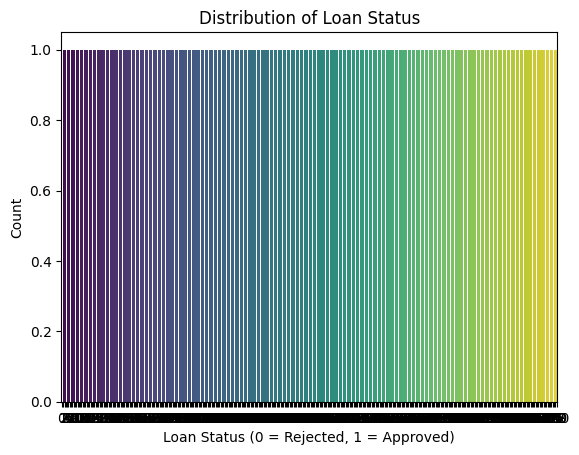

In [28]:
# Visualize the distribution of the target variable
sns.countplot(df['loan_status'], palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.show()

In [29]:
# Calculate class distribution
loan_status_distribution = df['loan_status'].value_counts(normalize=True) * 100
print("Loan Status Distribution:\n", loan_status_distribution)

Loan Status Distribution:
 loan_status
1    71.128609
0    28.871391
Name: proportion, dtype: float64


In [31]:
# List of numerical features
numerical_features = ['dependents', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'totalincome']

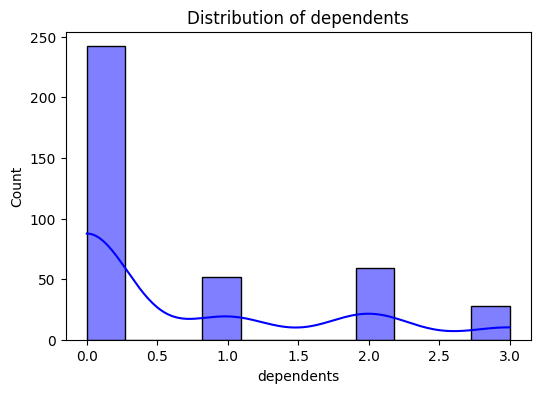

KeyError: 'applicantincome'

<Figure size 600x400 with 0 Axes>

In [32]:
# Distribution plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Credit history vs. Loan Status
sns.countplot(x='credit_history', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History (0 = No History, 1 = Good History)')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()


In [ ]:
# Property Area vs. Loan Status
sns.countplot(x='property_area', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area (Urban, Semi-Urban, Rural)')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

In [ ]:
# Outlier detection
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[feature], color='blue')
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

# Model Development
- Split data into features and target

In [33]:
# Define features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 304 samples
Testing set size: 77 samples


In [34]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict
log_reg_preds = log_reg.predict(X_test)
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]


In [36]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
rf_preds = rf_clf.predict(X_test)
rf_proba = rf_clf.predict_proba(X_test)[:, 1]


In [37]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict
xgb_preds = xgb_clf.predict(X_test)
xgb_proba = xgb_clf.predict_proba(X_test)[:, 1]

### Model Evaluation

In [38]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [39]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted avg       0.83      0.82      0.79        77

Confusion Matrix:
 [[ 8 13]
 [ 1 55]]
ROC-AUC Score: 0.7308673469387755


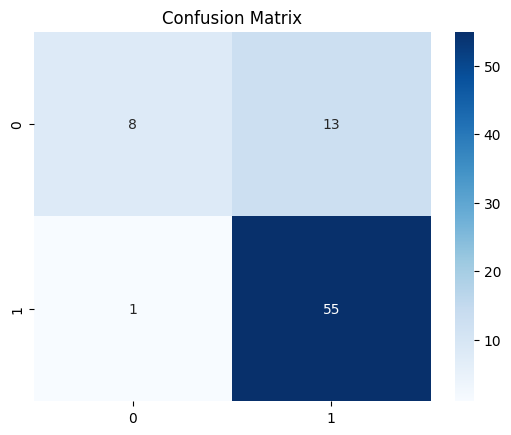

In [40]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Evaluation Metrics

In [41]:
# Function to evaluate a model
def evaluate_model(name, y_test, y_preds, y_proba):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_preds))
    print("Precision:", precision_score(y_test, y_preds))
    print("Recall:", recall_score(y_test, y_preds))
    print("F1-Score:", f1_score(y_test, y_preds))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

# Evaluate all models
evaluate_model("Logistic Regression", y_test, log_reg_preds, log_reg_proba)
evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
evaluate_model("XGBoost", y_test, xgb_preds, xgb_proba)

Model: Logistic Regression
Accuracy: 0.8181818181818182
Precision: 0.8
Recall: 1.0
F1-Score: 0.8888888888888888
ROC-AUC: 0.6403061224489796

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77

Confusion Matrix:
 [[ 7 14]
 [ 0 56]]
Model: Random Forest
Accuracy: 0.8181818181818182
Precision: 0.8088235294117647
Recall: 0.9821428571428571
F1-Score: 0.8870967741935484
ROC-AUC: 0.7308673469387755

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.38      0.53        21
           1       0.81      0.98      0.89        56

    accuracy                           0.82        77
   macro avg       0.85      0.68      0.71        77
weighted 

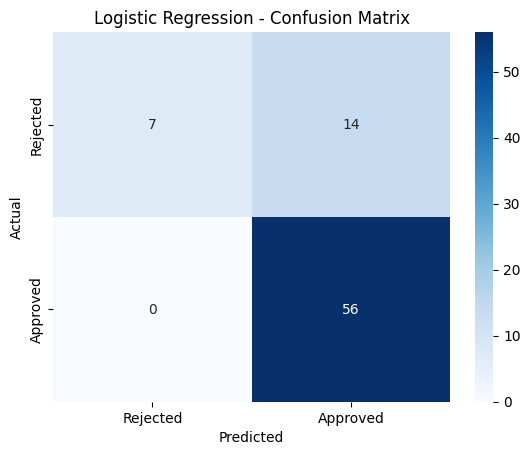

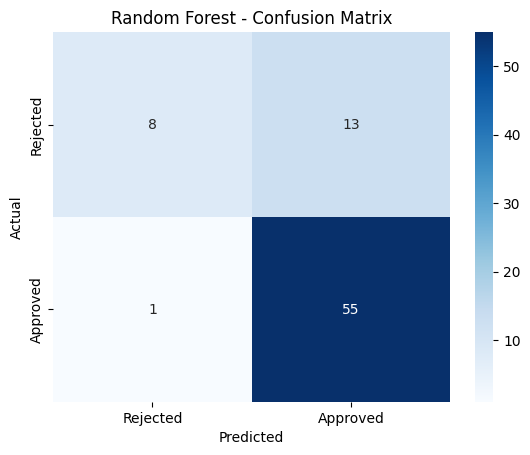

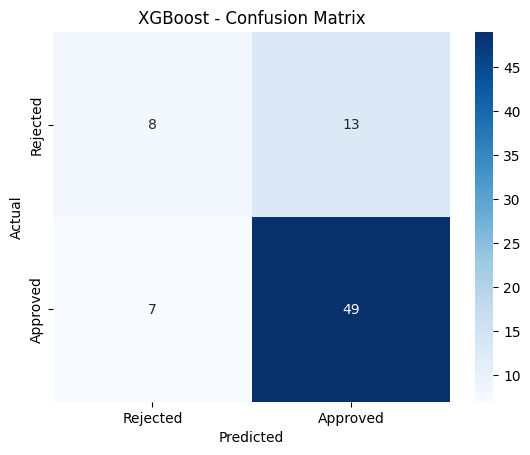

In [42]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_preds, model_name):
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, log_reg_preds, "Logistic Regression")
plot_confusion_matrix(y_test, rf_preds, "Random Forest")
plot_confusion_matrix(y_test, xgb_preds, "XGBoost")


### Feature Importance

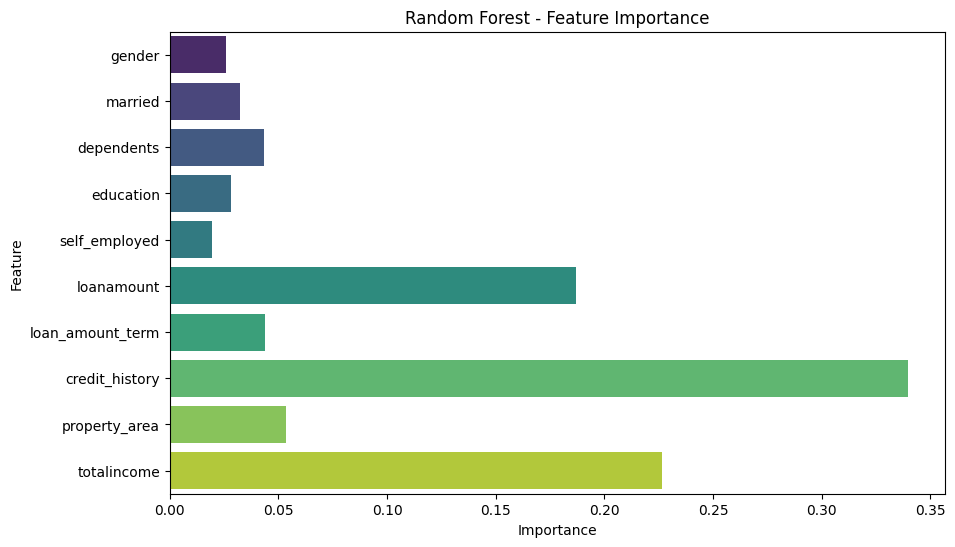

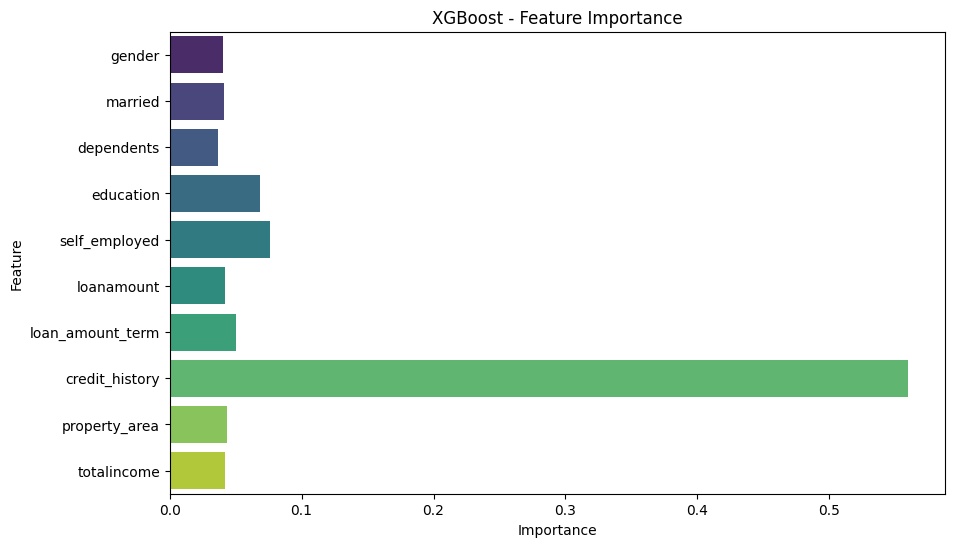

In [43]:
# Random Forest Feature Importance
importances = rf_clf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# XGBoost Feature Importance
xgb_importances = xgb_clf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances, y=features, palette='viridis')
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Save the Model for Deployment